In [3]:
####################
# Load the dataset #
####################
from sklearn.datasets import fetch_openml

#Comes with the data, labes and features describing the data
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
#The data and the labels
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


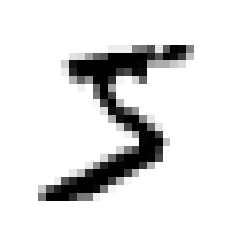

5


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print(y[0])

In [6]:
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
#############################################
# Start with Binary Classifier, 5 and not-5 #
#############################################
y_train_5 = (y_train == 5) #treue for all 5
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

print(sgd_clf.predict([some_digit]))

[ True]


In [8]:
#Implement Cross-Validation in order to evaluate the model. this does roughly the same thing as scikits learns cross_val_score() function
#good to know how things work even when there are built in functions.
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

/home/rcalkins/Projects2020/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [9]:
#using the built in function to do the above
from sklearn.model_selection import cross_val_score
results = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #the model, the training data and labels, the number of folds

print(results)

[0.95035 0.96035 0.9604 ]


In [10]:
#The above results are relativly high! is this good? Well since it is mostly not-5s and the number of 5s are infrequeny, then even if you guessed
#everything to not be a 5 you will get a majority of the dataset correct! Accuracy might not be the best judge of a models functionality.
#A confusion matrix can be used to help see how well a model is performing

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
result = confusion_matrix(y_train_5, y_train_pred)
print(result)
#each row represents an actual class while each column represents a predicted class
#       predicted     non-5    5
#actual          
#   non-5
#      5

[[53892   687]
 [ 1891  3530]]


In [12]:
#precision and recall. Using our confusion matrix we can get data that will let us know how well the classifier model is
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

#This precision and recall trade off can be manipulated with various threshholds. Depending on the need of the model
#it might be better or worse to have higher precision.


0.8370879772350012
0.6511713705958311


In [13]:
#### Multiclass Classification ####
#You can train a binary classifier for each class, then compare the results (OvR) Few classifiers but large dataset
#Or you can train more models to classify between two catagories. i.e 0 v 1, 0 v 2, 1 v 2.... Many models but trained on smaller dataset (OvO)

#this will do OvO automatically to predict on whole dataset
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
print(svm_clf.predict([some_digit]))

[5]


In [ ]:
#to force a model to do OvR or OvR you can!

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

In [ ]:
#Lets see how it did with a confusion matrix
